In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=18)

plt.rc('figure', figsize=(12,9))
np.set_printoptions(precision=4)

In [12]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
# < 数据预处理 >-------------------
# 如果缺值的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果了
# 如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中
# 如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中。
# 有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上。
# 填充缺失值
from sklearn.ensemble import RandomForestRegressor
# 使用RandomForestClassfier填补缺失的年龄

def set_missing_ages(df):
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    
    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    
    # y即目标年龄
    y = known_age[:,0]
    
    # X即特征属性值
    X = known_age[:,1:]
    
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X,y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:,1:])
    
    # 用得到的预测结果填补缺失数据
    df.loc[ (df.Age.isnull()), 'Age'] = predictedAges
    
    return df, rfr

def set_Cabin_type(df):#!!!!!!!!
    df.loc[(df.Cabin.notnull()),'Cabin'] = "Yes"
    df.loc[(df.Cabin.isnull()),'Cabin'] = "No"
    
    return df

train, rfr = set_missing_ages(train)
train = set_Cabin_type(train)

print train
print rfr

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [21]:

# 用二元值代替标量
dummies_Cabin = pd.get_dummies(train['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(train['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(train['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(train['Pclass'], prefix='Pclass')
# train1 = train[['PassengerId','SibSp','Parch','Fare','Age','Survived']]
# data_f = pd.concat([train1,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis=1)

data_f = pd.concat([train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
data_f.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
data_f.head()

In [38]:
# 规模缩放
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(data_f[['Age']]) # 计算均值和标准差
data_f['Age_scaled'] = scaler.fit_transform(data_f[['Age']], age_scale_param)

fare_scale_param = scaler.fit(data_f[['Fare']])
data_f['Fare_scaled'] = scaler.fit_transform(data_f[['Fare']], fare_scale_param)
data_f.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,fare_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445,-0.502445
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845,0.786845
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854,-0.488854
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730,0.420730
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337,-0.486337


In [40]:
# < 逻辑回归模型 >--------------------
# 我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模（训练模型）。
from sklearn import linear_model

#用re模块取出属性值
data_f1 = data_f.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
data_f1np = data_f1.as_matrix()

# y就是Survival结果
y = data_f1np[:,0]

# X就是特征属性值
X = data_f1np[:,1:]

#fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X,y)

clf#得到一个model

data_f1.columns

Index([u'Survived', u'SibSp', u'Parch', u'Cabin_No', u'Cabin_Yes',
       u'Embarked_C', u'Embarked_Q', u'Embarked_S', u'Sex_female', u'Sex_male',
       u'Pclass_1', u'Pclass_2', u'Pclass_3', u'Age_scaled', u'Fare_scaled'],
      dtype='object')

In [28]:
#将测试集数据进行像训练集一样的数据处理
test = pd.read_csv('test.csv')
test.loc[(test.Fare.isnull()),'Fare'] = 0 # 将'Fare'字段的空值用0代替-->由于训练集中的Fare没有空值，所以没有对其进行处理 

# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄

age_df = test[['Age','Fare','Parch','SibSp','Pclass']]
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
predictedAges = rfr.predict(unknown_age[:,1:]) # 直接用之前运行过的rfr来预测预测年龄为空的值
test.loc[(test.Age.isnull()),'Age']=predictedAges
test = set_Cabin_type(test)

#　二元值表示非数值型数据
dummies_Cabin = pd.get_dummies(test['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(test['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(test['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(test['Pclass'], prefix='Pclass')

# test1 = test[['PassengerId','SibSp','Parch','Fare','Age']]
# test_f = pd.concat([test1,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis=1)

test_f = pd.concat([test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
test_f.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)



In [43]:
age_scale_param = scaler.fit(test_f[['Age']])
test_f['Age_scaled'] = scaler.fit_transform(test_f[['Age']], age_scale_param)
fare_scale_param = scaler.fit(test_f[['Fare']])
test_f['Fare_scaled'] = scaler.fit_transform(test_f[['Fare']], fare_scale_param)
test_f.head()
test1 = test_f.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test1) # 用训练得到的模型进行预测
result = pd.DataFrame({'PassengerId':test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)


In [44]:
# 逻辑回归系统优化
# 模型系数关联分析
from sklearn import linear_model
import sklearn.preprocessing as preprocessing
# model系数和feature关联起来
pd.DataFrame({'columns':list(data_f1.columns)[1:],'coef':list(clf.coef_.T)})


,coef,columns
0,[-0.344236173953],SibSp
1,[-0.104915621519],Parch
2,[-0.392267576575],Cabin_No
3,[0.509833040712],Cabin_Yes
4,[0.0],Embarked_C
5,[0.0],Embarked_Q
6,[-0.417259984135],Embarked_S
7,[2.34883299813],Sex_female
8,[-0.285159623565],Sex_male
9,[0.341172283857],Pclass_1


In [45]:

from sklearn import cross_validation
 #简单看看打分情况
clf1 = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = data_f.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.as_matrix()[:,1:]
y = all_data.as_matrix()[:,0]
print cross_validation.cross_val_score(clf1, X, y, cv=5)

[ 0.8156  0.8156  0.7865  0.7865  0.8136]


D:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
#观察坏数据集
# 分割数据 按照训练数据：cv数据=7：3的比例
train_split, cv_split = cross_validation.train_test_split(data_f, test_size=0.3, random_state=0)
train_df = train_split.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
cv_df = cv_split.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
#生成模型
clf = linear_model.LogisticRegression(C=1.0,penalty='l1', tol=1e-6)
clf.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])

# 对cross validation数据进行预测
predictions = clf.predict(cv_df.as_matrix()[:,1:])

origin_data_train = pd.read_csv('train.csv')
bad_cases = origin_data_train[origin_data_train['PassengerId'].isin(cv_split[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]

bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.00,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.00,0,0,A/5 3540,8.0500,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


# 学习曲线

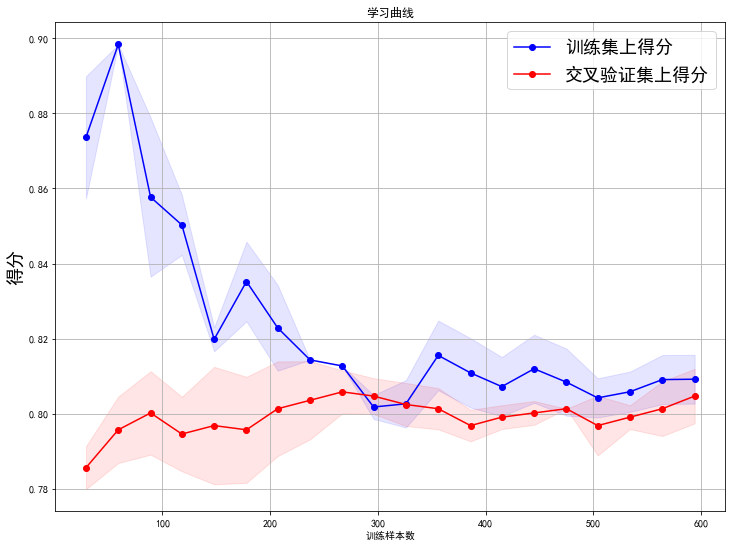

here


(0.80656968448540245, 0.018258876711338634)

In [67]:
from sklearn.learning_curve import learning_curve
plt.rcParams['font.sans-serif'] = ['SimHei']

#用sklearn 的leaning_curve得到training_score 和 cv_score 并画出学习曲线

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    
#     estimator : 你用的分类器。
#     title : 表格的标题。
#     X : 输入的feature，numpy类型
#     y : 输入的target vector
#     ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
#     cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
#     n_jobs : 并行的的任务数(默认1)

    train_sizes, train_scores, test_scores = learning_curve( 
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u'训练样本数')
        plt.ylabel(u'得分',fontproperties=font)
        plt.grid()
        
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
        
        plt.legend(loc='best',prop=font)
        
        plt.draw()
        plt.show()
        print 'here'
#         plt.gca().invert_yaxis()
        
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff
        
 
plot_learning_curve(clf, u'学习曲线',X, y)


# 模型融合

In [68]:
from sklearn.ensemble import BaggingRegressor

train_d = data_f.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

train_np = train_d.as_matrix()

# y就是Survival结果
y = train_np[:,0]

# X就是特征属性值
X = train_np[:,1:]

#fit到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

testf = test_f.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(testf)

result = pd.DataFrame({'PassengerId':test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
